# Описание проекта

Интернет-магазин продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). 

Необходимо выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Описание данных:
* Name — название игры
* Platform — платформа
* Year_of_Release — год выпуска
* Genre — жанр игры
* NA_sales — продажи в Северной Америке (миллионы проданных копий)
* EU_sales — продажи в Европе (миллионы проданных копий)
* JP_sales — продажи в Японии (миллионы проданных копий)
* Other_sales — продажи в других странах (миллионы проданных копий)
* Critic_Score — оценка критиков (максимум 100)
* User_Score — оценка пользователей (максимум 10)
* Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

## Первичный обзор данных

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import random as rd
from scipy import stats as st

pd.options.display.max_columns = 1000

In [2]:
data = pd.read_csv(r'C:\Users\damos\OneDrive\Рабочий стол\Анализ данных\Проекты\Сборный Проект — 1\games.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [3]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Year_of_Release,16446.0,2006.484616,5.877050,1980.0,2003.0,2007.00,2010.00,2016.00
NA_sales,16715.0,0.263377,0.813604,0.0,0.0,0.08,0.24,41.36
EU_sales,16715.0,0.145060,0.503339,0.0,0.0,0.02,0.11,28.96
JP_sales,16715.0,0.077617,0.308853,0.0,0.0,0.00,0.04,10.22
Other_sales,16715.0,0.047342,0.186731,0.0,0.0,0.01,0.03,10.57
Critic_Score,8137.0,68.967679,13.938165,13.0,60.0,71.00,79.00,98.00


In [4]:
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [5]:
print('Количество полных дубликатов в файле:',data.duplicated().sum())

Количество полных дубликатов в файле: 0


In [6]:
data[data.duplicated(['Name','Platform'],keep = False)].sort_values('Name')

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
604,Madden NFL 13,PS3,2012.0,Sports,2.11,0.22,0.00,0.23,83.0,5.5,E
16230,Madden NFL 13,PS3,2012.0,Sports,0.00,0.01,0.00,0.00,83.0,5.5,E
1190,Need for Speed: Most Wanted,X360,2012.0,Racing,0.62,0.78,0.01,0.15,83.0,8.5,T
1591,Need for Speed: Most Wanted,X360,2005.0,Racing,1.00,0.13,0.02,0.10,83.0,8.5,T
5972,Need for Speed: Most Wanted,PC,2005.0,Racing,0.02,0.23,0.00,0.04,82.0,8.5,T
11715,Need for Speed: Most Wanted,PC,2012.0,Racing,0.00,0.06,0.00,0.02,82.0,8.5,T
1745,Sonic the Hedgehog,PS3,2006.0,Platform,0.41,0.06,0.04,0.66,43.0,4.1,E10+
4127,Sonic the Hedgehog,PS3,NaN,Platform,0.00,0.48,0.00,0.00,43.0,4.1,E10+
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [7]:
list_columns = ['Name','Platform','Genre','Rating']

for column in list_columns:
    print(
        f'Уникальные значения в столбце {column}:',
        '\n','\n',data[column].unique(),'\n'
    )

Уникальные значения в столбце Name: 
 
 ['Wii Sports' 'Super Mario Bros.' 'Mario Kart Wii' ...
 'Woody Woodpecker in Crazy Castle 5' 'LMA Manager 2007'
 'Haitaka no Psychedelica'] 

Уникальные значения в столбце Platform: 
 
 ['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' 'PS4' '3DS' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'XOne' 'WiiU' 'GC' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX'] 

Уникальные значения в столбце Genre: 
 
 ['Sports' 'Platform' 'Racing' 'Role-Playing' 'Puzzle' 'Misc' 'Shooter'
 'Simulation' 'Action' 'Fighting' 'Adventure' 'Strategy' nan] 

Уникальные значения в столбце Rating: 
 
 ['E' nan 'M' 'T' 'E10+' 'K-A' 'AO' 'EC' 'RP'] 



<b>При первичном обзоре данных были выявлены следующие особенности датасета:</b>

* 16715 строчек, 11 столбцов
* в столбцах `Name`,`Year_of_Release`,`Genre`,`Critic_Score `,`User_Score`,`Rating` присутствуют пропуски
* в названиях столбцов используется верхний регистр
* в столбцах `User_Score`,`Year_of_Release` необходимо изменить тип данных
* в файле отсутсвуют полные дубликаты
* в столбцах с категориальными переменными неявные дубликаты выявлены не были
* странным выглядит нулевая медиана по продажам в Японии
* были выявлены неявные дубликаты, которые требуют обработки


## Подготовка данных

Напишем функцию для построения линейного графика по заданным параметрам

In [8]:
def linear_graph(dataframe,columnx,columny,label,ylabel,dataframename,ax):
    if ax == True:
        graph = dataframe.plot(
        y = columny,
        x = columnx, legend = True,label = label,
        title = f'График по столбцам {columnx} и {columny} для датафрейфа :{dataframename}',
        grid = True,figsize = (12,7),ax = a
        )
    else:
        graph = dataframe.plot(
        y = columny,
        x = columnx, legend = True,label = label,
        title = f'График по столбцам {columnx} и {columny}  для датафрейфа :{dataframename}',
        grid = True,figsize = (12,5)
        )
    graph.set_ylabel(ylabel)
    return graph

Напишем функцию для построения сводной таблицы по заданным параметрам

In [9]:
def pivot_for_df(dataframe,for_index,for_values,for_agg):
    pivot = dataframe.pivot_table(
        index = for_index,
        values = for_values,
        aggfunc = for_agg
    ).reset_index()
    return  pivot

### Названия столбцов и тип данных

<b>Приведем наименования столбцов к нижнему регистру</b>

In [10]:
data.columns = data.columns.str.lower()

<b>Преобразуем данные в нужные типы</b>

При изменении типа данных в столбце `user_score` появляется ошибка:

* Unable to parse string "tbd" at position 119

tbd - to be determined (подлежит уточнению)

Заменим tbd на значения NA, так как оценки отсутствуют и изменим тип данных на float64, так как очки могут содержать разряды.

В столбце `year_of_release` изменим тип данных на int, так как значения в данном столбце указаны не как полноценная дата, а как год. При измении типа данных появилась ошибка:

* Cannot convert non-finite values (NA or inf) to integer

Метод astype встречает значения NA, проигнорируем их.

In [11]:
data['user_score'] = pd.to_numeric(data['user_score'],errors='coerce')
data['year_of_release'] = data['year_of_release'].astype(int,errors='ignore')

### Обработаем дубликаты

In [12]:
duplicates = data[
    (data.name != 'Need for Speed: Most Wanted') & 
    (data.duplicated(['name','platform'],keep = False))
].sort_values('name')
duplicates

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,Madden NFL 13,PS3,2012.0,Sports,2.11,0.22,0.00,0.23,83.0,5.5,E
16230,Madden NFL 13,PS3,2012.0,Sports,0.00,0.01,0.00,0.00,83.0,5.5,E
1745,Sonic the Hedgehog,PS3,2006.0,Platform,0.41,0.06,0.04,0.66,43.0,4.1,E10+
4127,Sonic the Hedgehog,PS3,NaN,Platform,0.00,0.48,0.00,0.00,43.0,4.1,E10+
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Так как дубликатов всего три, обработаем их вручную (без функции или цикла)

In [13]:
data.loc[604,'eu_sales'] = data.loc[604,'eu_sales']+data.loc[16230,'eu_sales']
data.loc[1745,'eu_sales'] = data.loc[1745,'eu_sales']+data.loc[4127,'eu_sales']
data.loc[659,'jp_sales'] = data.loc[659,'jp_sales']+data.loc[14244,'jp_sales']
data.loc[4127,'year_of_release']=2006


Дубликаты имеют индекс больший, чем основная строка, поэтому можем применить метод drop_duplicates, он удалит как раз именно их. В дубликат игры Sonic the Hedgehog было внесено значение year_of_release, так как удалять дубликаты будем по трем столбцам ['name','platform','year_of_release'] - чтобы избежать удаления игры Need for Speed: Most Wanted 

In [14]:
data = data.drop_duplicates(subset = ['name','platform','year_of_release']).reset_index(drop=True)
# проверка
data.duplicated(subset = ['name','platform','year_of_release']).sum()

0

### Обработаем пропуски

* Объясним, почему заполнили пропуски определённым образом или почему не стали это делать;
* Опишим причины, которые могли привести к пропускам;
* Обратим внимание на аббревиатуру 'tbd' в столбце с оценкой пользователей. Отдельно разберем это значение и опишим, как его обработать (обработано в предыдущей части)

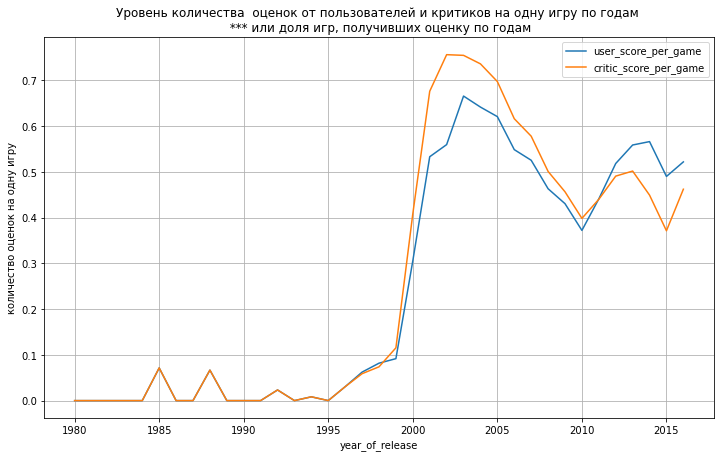

In [15]:
score_per_game = pivot_for_df(data,'year_of_release',['name','user_score','critic_score'],'count')

score_per_game['user_score_per_game'] = score_per_game['user_score']/score_per_game['name']
score_per_game['critic_score_per_game'] = score_per_game['critic_score']/score_per_game['name']

a = linear_graph(
    score_per_game,'year_of_release','user_score_per_game',
    'user_score_per_game',"количество оценок на одну игру",'score_per_game',False)
linear_graph(
    score_per_game,'year_of_release','critic_score_per_game',
    'critic_score_per_game',"количество оценок на одну игру",'score_per_game',True)
plt.title ('Уровень количества  оценок от пользователей и критиков на одну игру по годам \
\n *** или доля игр, получивших оценку по годам');

* Количество пропусков в столбцах с оценками экспертов и с оценками пользователей свзяана со временем -  доля игр, получивших оценку от критиков или пользователей, была очень низкой вплоть до 2000ых, и начала расти в дальнейшем. Обусловлено это может быть разными причинами - от технической стороны вопроса до отсутсвия практики оценивания такого нового продукта, как игра на платформе.
* Вторым фактором будут являться сами пользователи/критики, так как не все пользователи/критики оставляют отзывы/ставят оценки.


 Для региона na_sales количество игр, по которым были продажи : 12207 
 Количество проданных игр, которым был присвоен рейтинг : 9173 
 Доля проданных игр с рейтингом в общем количестве проданных игр для региона:75.15%


 Для региона eu_sales количество игр, по которым были продажи : 10843 
 Количество проданных игр, которым был присвоен рейтинг : 7814 
 Доля проданных игр с рейтингом в общем количестве проданных игр для региона:72.06%


 Для региона jp_sales количество игр, по которым были продажи : 6201 
 Количество проданных игр, которым был присвоен рейтинг : 2203 
 Доля проданных игр с рейтингом в общем количестве проданных игр для региона:35.53%



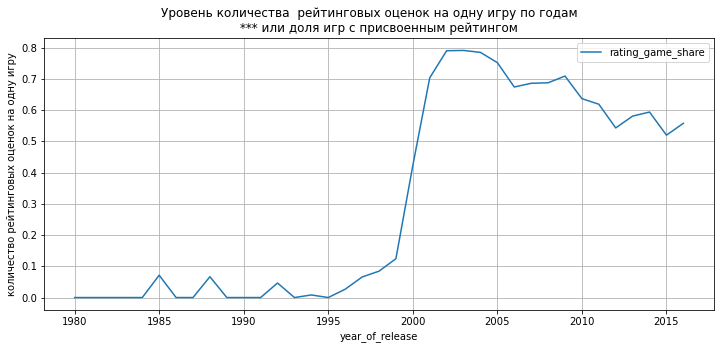

In [16]:
regions_sales = ['na_sales','eu_sales','jp_sales'] 
    
for item in regions_sales:
    games_qty_rating = data[data[item]!= 0]['rating'].count()
    games_qty_sales = data[data[item]!= 0]['na_sales'].count()
    share = games_qty_rating/games_qty_sales
    print('\n',
        f'Для региона {item} количество игр, по которым были продажи : {games_qty_sales}', '\n',
        f'Количество проданных игр, которым был присвоен рейтинг : {games_qty_rating}', '\n',
        'Доля проданных игр с рейтингом в общем количестве проданных игр для региона:{:.2%}'.format(share),
        end = '\n\n'
    )
    
rating_per_game = pivot_for_df(data,'year_of_release',['rating','name'],'count')

rating_per_game['rating_game_share'] = rating_per_game['rating']/rating_per_game['name']
linear_graph(
    rating_per_game,'year_of_release','rating_game_share',
    'rating_game_share',"количество рейтинговых оценок на одну игру",'rating_per_game',False);
plt.title (
    'Уровень количества  рейтинговых оценок на одну игру по годам \
    \n*** или доля игр с присвоенным рейтингом'
);

Количество пропусков  в столбце rating  свяазано с :
* работой рейтингового агенства, так например в регионе NA 25 процентам проданных игр  не было присвоено рейтинга, либо из за технических проблем этот рейтинг не выгрузился 
* временем выпуска игры, так мы можем уввидеть на графике, что с 80-ых по конец 90-ых доля игр получавших рейтинговую оценку была очень мала. Рост доли игра , получающих рейтинг, рос с 2000 по 2005
* с регионом, так в Европе и Америке рейтинг присвоен 72-75 % проданных игр, в то время как в Японии рейтинг присвоен лишь 35 %.


<b> Пропуски в столбце year_of_release </b>

Проверим, какую долю составляют пропуски от общего числа значений в столбце year_of_release

In [17]:
share_nan_years =  (
    data['year_of_release'].isna().sum()/
    data['year_of_release'].shape[0])

print(
    '\n','Доля пропусков в столюбце year_of_release :{:.2%}'
    .format(share_nan_years),end ='\n' 
)
      



 Доля пропусков в столюбце year_of_release :1.60%


Удалим строки с пропущенными значениями

In [18]:
data = data.dropna(axis = 0,subset = ['year_of_release'])

После удаления пропусков, преобразуем опять данные в этом столбце к типу int, так как после первой обработки тип float все еще оставался( возможно из за пропусков)

In [19]:
data['year_of_release'] = data['year_of_release'].astype(int,errors='ignore')

<b> Пропуски в столбце rating  </b>

Изучая датасет, было обнаружено, что некоторые игры выходили на нескольких платформах, если рейтинг не зависит от платформы,то можно сказать, что в случае если игра имеет какой то рейтинг на одной платформе, то скорее всего она будет иметь его и на другой.

К примеру рассмотрим игры LEGO Marvel Super Heroes и Madden NFL 07

In [20]:
data.query(
    'name == ["Madden NFL 07","LEGO Marvel Super Heroes"]'
)[['name','platform','year_of_release','rating']].sort_values(by = "name").T

,2778,730,945,1139,1959,5053,2313,8368,3876,7371,4006,241,3229,2035,972,3838,14887
name,LEGO Marvel Super Heroes,LEGO Marvel Super Heroes,LEGO Marvel Super Heroes,LEGO Marvel Super Heroes,LEGO Marvel Super Heroes,LEGO Marvel Super Heroes,LEGO Marvel Super Heroes,LEGO Marvel Super Heroes,LEGO Marvel Super Heroes,Madden NFL 07,Madden NFL 07,Madden NFL 07,Madden NFL 07,Madden NFL 07,Madden NFL 07,Madden NFL 07,Madden NFL 07
platform,WiiU,X360,PS3,PS4,XOne,DS,3DS,PC,PSV,DS,Wii,PS2,GC,XB,X360,PS3,GBA
year_of_release,2013,2013,2013,2013,2013,2013,2013,2013,2013,2006,2006,2006,2006,2006,2006,2006,2006
rating,E10+,E10+,E10+,E10+,E10+,E10+,E10+,E10+,NaN,E,E,E,E,E,E,E,E


Проверим все ли игры имеют только один тип рейтинга

In [21]:
#создадим фрейм, в котором будут игры и рейтинги (без дубликатов и NA значений)
#и сделаем пивот таблицу, в которой посчитаем количество уникальных значений 
# рейтинга для каждой игры, нам важно, чтобы у каждой игры было только одно такое значение

rating_table = (
    data[['name','rating']]
    .drop_duplicates()
    .dropna(axis = 0, subset = ['rating'])
    .groupby('name')['rating'].count().reset_index()
    .sort_values(by = 'rating', ascending = False)
)

rating_table.head(50).T


,1078,4440,1171,1983,5244,5887,5886,2178,2177,2176,2175,915,4925,2174,2664,380,1765,5438,3554,2734,308,5088,5087,3696,382,4660,4555,5379,5506,3556,4030,5009,630,5010,2328,4170,2660,1105,2662,2333,2334,5892,5891,2663,2409,2517,5291,1703,3171,2686
name,Dawn of Discovery,Shaun White Snowboarding,DiRT 2,Ghostbusters: The Video Game,The Sims 2: Castaway,X-Men: Destiny,X-Men Origins: Wolverine,Harry Potter and the Order of the Phoenix,Harry Potter and the Half-Blood Prince,Harry Potter and the Goblet of Fire,Harry Potter and the Deathly Hallows - Part 2,Coraline,Superman Returns,Harry Potter and the Deathly Hallows - Part 1,LEGO Star Wars: The Complete Saga,Batman: Rise of Sin Tzu,Final Fantasy III,Top Gun,Need for Speed: ProStreet,LittleBigPlanet,Avatar: The Last Airbender,"The Chronicles of Narnia: The Lion, The Witch ...",The Chronicles of Narnia: Prince Caspian,PaRappa The Rapper,Batman: Vengeance,Space Chimps,Six Flags Fun Park,Tom Clancy's Ghost Recon,Tron 2.0: Killer App,Need for Speed: The Run,Rabbids Go Home,Teenage Mutant Ninja Turtles 2: Battle Nexus,Burnout Legends,Teenage Mutant Ninja Turtles 3: Mutant Nightmare,IL-2 Sturmovik: Birds of Prey,Ridge Racer,LEGO Rock Band,Dead to Rights,LEGO Star Wars II: The Original Trilogy,Ice Age 2: The Meltdown,Ice Age: Dawn of the Dinosaurs,X2: Wolverine's Revenge,X-Men: The Official Game,LEGO Star Wars III: The Clone Wars,Iron Man,Justice League Heroes,The Tale of Despereaux,Fantastic Four: Rise of the Silver Surfer,Monster Jam: Maximum Destruction,Legend of Kay
rating,3,3,3,3,3,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2


К сожалению, гипотеза не подтвердилась, у многих игр есть несколько типов рейтинга, а значит заполнить пропуски каким то одним значением мы не сможем. Предлагаю не заполнять пропуски ничем.

Заполним пропуски в столбце `year_of_release` значением `w/o_rating`, это пригодится нам для дальнейшего анализа.

In [22]:
data['rating'] = data['rating'].fillna('w/o_rating')
#проверка
data['rating'].isna().sum()


0

<b> Пропуски в столбце name  </b>

Проверим строки в которых нет наименования игр.

In [23]:
data.query('name.isna() == True')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.03,0.08,NaN,NaN,w/o_rating


Игр с отсутствующими названиями всего две, у них также отсутсвует жанр, оценки критиков, пользователей и рейтинги. У первой игры были большие продажи, но относятся они к очень далекому периоду времени. Поэтому считаю, что удаление этих строк не повредит дальнейшему анализу.

In [24]:
data = data.dropna(axis = 0, subset = ['name'])

In [25]:
data.shape

(16443, 11)

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16443 entries, 0 to 16711
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16443 non-null  object 
 2   year_of_release  16443 non-null  int32  
 3   genre            16443 non-null  object 
 4   na_sales         16443 non-null  float64
 5   eu_sales         16443 non-null  float64
 6   jp_sales         16443 non-null  float64
 7   other_sales      16443 non-null  float64
 8   critic_score     7982 non-null   float64
 9   user_score       7462 non-null   float64
 10  rating           16443 non-null  object 
dtypes: float64(6), int32(1), object(4)
memory usage: 1.4+ MB


<b> Выводы: </b>

* изменен тип данных в столбцах `user_score` и `year_of_release`
* пропуски в столбцах `critic_score` и`user_score` не были обработаны ввиду отсутсвия возможности это сделать
* обработаны пропуски в столбце `year_of_release` - они были удалены ввиду их незначительного количества
* в столбце `name` было всего два пропуска, строки с этими пропусками были удалены.
* количество пропусков в столбцах с оценками экспертов и с оценками пользователей свзяана со временем
* количество пропусков в столбце `rating` свяазано со временем и регионом, где проходили продажи.

### Посчитаем суммарные продажи 

In [27]:
def region_all_sales(row):
    sales = row['na_sales']+row['eu_sales']+row['jp_sales']+row['other_sales']
    return sales

data['total_sales'] = data.apply(region_all_sales, axis = 1)

## Исследовательский анализ данных

### Выпуск игр (по годам)

Посмотрим какое количество игр приходится на каждый год

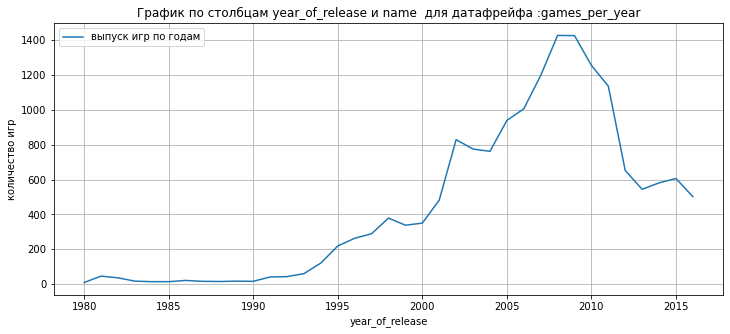

In [28]:
games_per_year  = pivot_for_df(data,'year_of_release','name','count')
linear_graph(games_per_year ,'year_of_release','name','выпуск игр по годам',"количество игр",'games_per_year',False);

<b> Вывод :</b>

* Глядя на график можем увидеть, что в период с 1980 по 1995 года количество игр было значительно меньше, чем в остальное время.
* С 2000 года происходит резкий скачок в росте.
* Наибольшое количество игр приходится на 2008-2009 года
* Количество игр росло вплоть до 2009 года, затем происходит снижение.


### Изменение продаж (по платформам)

* Выберем платформы с наибольшими суммарными продажами и построим распределение по годам. 
* Проверим за какой характерный срок появляются новые и исчезают старые платформы.

In [29]:
sales_per_platform = (
    pivot_for_df(data,'platform','total_sales','sum')
    .sort_values(by = 'total_sales',ascending = False).reset_index(drop = True)
)
sales_per_platform.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30
platform,PS2,X360,PS3,Wii,DS,PS,PS4,GBA,PSP,3DS,PC,GB,XB,NES,N64,SNES,GC,XOne,2600,WiiU,PSV,SAT,GEN,DC,SCD,NG,WS,TG16,3DO,GG,PCFX
total_sales,1233.56,961.24,931.82,891.18,802.78,727.58,314.14,312.88,289.53,257.81,255.76,254.43,251.57,251.05,218.01,200.04,196.73,159.32,86.48,82.19,53.81,33.59,28.35,15.95,1.86,1.44,1.42,0.16,0.1,0.04,0.03


In [30]:
top_10_list = list(sales_per_platform.loc[0:9,'platform'])
print('\n','Топ 10 платформ по объему продаж:',2*'\n',top_10_list)


 Топ 10 платформ по объему продаж: 

 ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'PS4', 'GBA', 'PSP', '3DS']


Создадим переменную sales_top_platforms и добавим в нее разбивку по годам, продажам для топ 10 платформ

In [31]:
sales_top_platforms = (
    pivot_for_df(data.query(f'platform == {top_10_list}'),['year_of_release','platform'],'total_sales','sum')
    .reset_index(drop = True)
)

Построим график для визуализации сроков, за который появляются новые и исчезают старые платформы

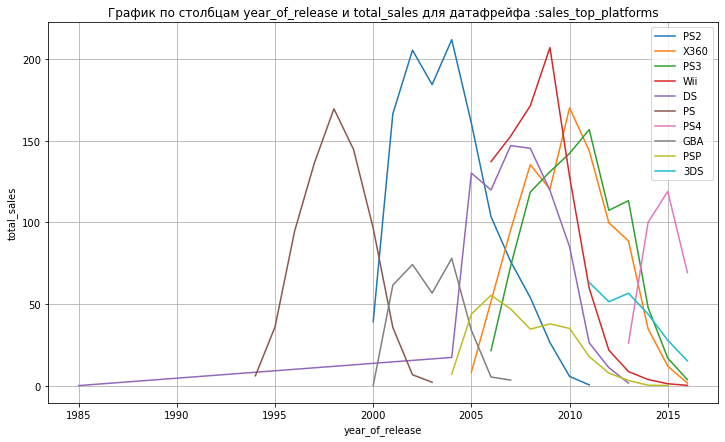

In [32]:
for item in top_10_list:
    if item == top_10_list[0]:
        a = linear_graph(
            sales_top_platforms[sales_top_platforms['platform']== item],
            'year_of_release','total_sales',item,'total_sales',
            'sales_top_platforms',False
        )
        a
    else:
        linear_graph(
            sales_top_platforms[sales_top_platforms['platform']== item],
            'year_of_release','total_sales',item,'total_sales',
            'sales_top_platforms',True
        )

На графике визуально можем заметить, что период, за который появляются новые и исчезают старые платформы , колеблется в пределах приблизительно 5-10 лет. Чтобы точнее ответить на этот вопрос, рассчитаем период для каждой платформы.

In [33]:
for item in top_10_list:
        period = (
            sales_top_platforms[sales_top_platforms['platform'] == item]\
            ['year_of_release'].max() -\
            sales_top_platforms[sales_top_platforms['platform'] == item]\
            ['year_of_release'].min()
        )
        print(f'Для платформы {item} срок составил {period} лет')


Для платформы PS2 срок составил 11 лет
Для платформы X360 срок составил 11 лет
Для платформы PS3 срок составил 10 лет
Для платформы Wii срок составил 10 лет
Для платформы DS срок составил 28 лет
Для платформы PS срок составил 9 лет
Для платформы PS4 срок составил 3 лет
Для платформы GBA срок составил 7 лет
Для платформы PSP срок составил 11 лет
Для платформы 3DS срок составил 5 лет


Странным является то, что у платформы DS были продажи в 1985 году, затем они прекратились и опять начались в 2004. Судя по всему это ошибка в данных, так как консоль Nintendo DS появилась в 2004. Так как для дальнейшего анализа мы будем выбирать период, 1985 год в него скорее не войдет, и эта ошибка никак не повлияет на ход анализа.

<b> Вывод :</b>

* Средний срок, за который появляются новые и исчезают старые платформы - 10 лет
*  Топ 10 платформ по объему продаж:

   ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'GBA', 'PS4', 'PSP', '3DS']
* Странным является то, что у платформы DS были продажи в 1985 году, затем они прекратились и опять начались в 2004. 

### Выбор актуального периода

* Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.
* Не учитывайте в работе данные за предыдущие годы.

Основываясь на проведенном анализе игровых платформ и выпуске игр по годам, выберем актуальный период, с помощью которого простроим прогноз на 2017 год. Основными факторами для выбора данного периода будут являться:

* количество выпущенных игр - чем больше игр было выпущено в год, тем объемнее будет база для анализа, малое количество выпущенных игр в год делает эту базу не существенной


* срок устаривания игровых платформ - данный срок важен для анализа, так как дает нам возможность включить в актуальный период платформы , которые на данный момент все еще являющиеся действующими , либо которые были таковыми совсем недавно, это в свою очередь позволяет проанализировать текущие и совсем недавние пользовательские предпочтения, что делает базу для анализа актуальнее.


* близость актуального периода к прогнозируемуму периоду - чем ближе к 2017 году будут включенные в выбираемый период года, тем база для анализа будет акутальней. Более того, включение в выбираемый период лет достаточно далеких от 2017 будет создавать риски для анализа - можно сделать ошибочные выводы основываясь на данных ,например, 1985 года, так как с тех пор поменялось очень многое - от пользовательских предпочтений до технологий ,используемых в этом секторе.

Таким образом предлагаю выбрать период 2014 - 2016 актаульным, так как:

* данный период включает в себя достаточно большую выборку по выпущенным играм ( 10 % от всего датасета)
* он не больше среднего срока устаревания игровых платформ - 10-11 лет
* период достаточно близок к 2017 году.

In [34]:
actual_data = data.query('year_of_release >= 2014')

In [35]:
actual_data.shape[0]/data.shape[0]

0.10271848202882686

### Лидеры по продажам (платформы)

* Узнаем какие платформы лидируют по продажам, растут или падают.
* Выберем несколько потенциально прибыльных платформ.

<b> Посмотрим сколько и какие платформы попали в новый датасет </b> 

In [36]:
actual_platforms = list(actual_data['platform'].unique())
actual_platforms

['PS4', '3DS', 'XOne', 'WiiU', 'PS3', 'X360', 'PC', 'Wii', 'PSV', 'PSP']

In [37]:
len(actual_data['platform'].unique())

10

<b>Выберем топ 3 платформ по объему продаж:</b> 

In [38]:
sales_per_platform = (
    pivot_for_df(actual_data,'platform','total_sales','sum')
    .sort_values(by = 'total_sales',ascending = False).reset_index(drop = True)
)
sales_per_platform.T

,0,1,2,3,4,5,6,7,8,9
platform,PS4,XOne,3DS,PS3,X360,WiiU,PC,PSV,Wii,PSP
total_sales,288.15,140.36,86.68,68.18,48.22,42.98,27.05,22.4,5.07,0.36


In [39]:
top_3_list = list(sales_per_platform.loc[0:2,'platform'])
print('\n','Топ 3 платформ по объему продаж за 2014 - 2016 гг. :',2*'\n',top_3_list)


 Топ 3 платформ по объему продаж за 2014 - 2016 гг. : 

 ['PS4', 'XOne', '3DS']


<b>Выберем топ 3 платформ по динамике роста и динамике падения продаж: </b> 

Создадим пивот таблицу sales_actual с индексами - плтаформа и год релиза, и значениями - сумма продаж за год

In [40]:
sales_actual = (
    pivot_for_df(actual_data,['platform','year_of_release'],'total_sales','sum')
    .reset_index(drop = True)
)
sales_actual.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28
platform,3DS,3DS,3DS,PC,PC,PC,PS3,PS3,PS3,PS4,PS4,PS4,PSP,PSP,PSV,PSV,PSV,Wii,Wii,Wii,WiiU,WiiU,WiiU,X360,X360,X360,XOne,XOne,XOne
year_of_release,2014,2015,2016,2014,2015,2016,2014,2015,2016,2014,2015,2016,2014,2015,2014,2015,2016,2014,2015,2016,2014,2015,2016,2014,2015,2016,2014,2015,2016
total_sales,43.76,27.78,15.14,13.28,8.52,5.25,47.76,16.82,3.6,100.0,118.9,69.25,0.24,0.12,11.9,6.25,4.25,3.75,1.14,0.18,22.03,16.35,4.6,34.74,11.96,1.52,54.07,60.14,26.15


Построим график по объему продаж по годам для каждой платформы.

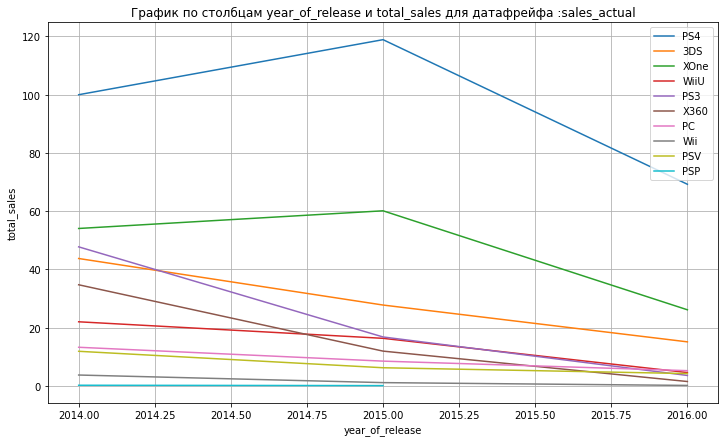

In [41]:
for item in actual_platforms:
    if item == actual_platforms[0]:
        a = linear_graph(
            sales_actual[sales_actual['platform']== item],
            'year_of_release','total_sales',item,'total_sales',
            'sales_actual',False
        )
        a
    else:
        linear_graph(
            sales_actual[sales_actual['platform']== item],
            'year_of_release','total_sales',item,'total_sales',
            'sales_actual',True
        )


Добавим в датафрейм sales_actual столбец, который будет содержать в себе данные по приросту продаж год к году в процентах для каждой платформы, вычисляемые по след формуле - ∆ ТР = (Птек – Пбаз) / Пбаз х 100%, где Птек - значение за текущий период, Пбаз - значение за предыдущий период. Зная значение прироста за каждый год, мы сможем вычислить среднее значение прироста за год. Этот показатель поможет нам ответить на вопрос о динамике роста/падения продаж.


In [42]:
df = pd.DataFrame()

pd.options.mode.chained_assignment = None 

for item in actual_platforms:
    dataframe = sales_actual.loc[sales_actual['platform'] == item,:]
    dataframe.loc[:,'rate_of_increase_%'] = \
    dataframe.loc[ :,'total_sales'].pct_change()*100
    df = pd.concat([df,dataframe],axis =0);
    
pd.options.mode.chained_assignment = "raise"

df = df.fillna(0)
sales_actual = df

sales_actual.head()


,platform,year_of_release,total_sales,rate_of_increase_%
9,PS4,2014,100.00,0.000000
10,PS4,2015,118.90,18.900000
11,PS4,2016,69.25,-41.757780
0,3DS,2014,43.76,0.000000
1,3DS,2015,27.78,-36.517367




Построим график для демонстрации динамики изменения прироста в продажах от года к году для каждой платформы:


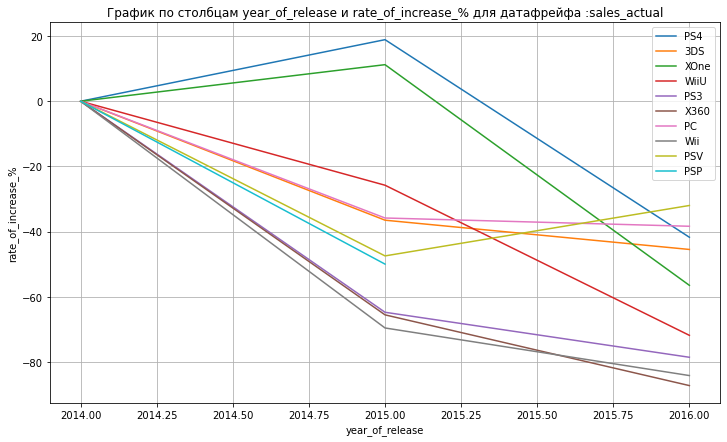

In [43]:
for item in actual_platforms:
    if item == actual_platforms[0]:
        a = linear_graph(
            sales_actual[sales_actual['platform']== item],
            'year_of_release','rate_of_increase_%',item,'rate_of_increase_%',
            'sales_actual',False
        )
        a
    else:
        linear_graph(
            sales_actual[sales_actual['platform']== item],
            'year_of_release','rate_of_increase_%',item,'rate_of_increase_%',
            'sales_actual',True
        )


Посчитаем для каждой платформы среднее по годовому приросту в процентах:

In [44]:
(
    pivot_for_df(sales_actual,'platform','rate_of_increase_%','mean')
    .sort_values(by = 'rate_of_increase_%',ascending = False)
    .reset_index(drop= True)
)


,platform,rate_of_increase_%
0,PS4,-7.619260
1,XOne,-15.097312
2,PC,-24.741218
3,PSP,-25.000000
4,PSV,-26.492997
5,3DS,-27.339242
6,WiiU,-32.549489
7,PS3,-47.793051
8,X360,-50.954599
9,Wii,-51.270175


И напомним об абсолютных значениях по продажам.

In [45]:
sales_per_platform.T

,0,1,2,3,4,5,6,7,8,9
platform,PS4,XOne,3DS,PS3,X360,WiiU,PC,PSV,Wii,PSP
total_sales,288.15,140.36,86.68,68.18,48.22,42.98,27.05,22.4,5.07,0.36


<b>Вывод :</b>

Сразу стоить отметить, что у всех платформ заметна отрицательная динамика, топ 3 по приросту будут являться платформы с наименьшим уровнем отрицательной динамики.

* Топ 3 платформы по объему продаж за 2014 - 2016 гг. : PS4, XOne, 3DS.
* Топ 3 платформы по большему среднему годовому приросту в процентах: PS4, XOne, PC	.
* Топ 3 платформы по меньшему среднему годовому приросту в процентах : PS3, X360, Wii.

Таким образом выберем топ 3 потенциально прибыльных платформ. К ним отнесем в первую очередь PS4, XOne - они показывыют наименее отрицательный прирост год к к году (в процентах) и имеют хорошие показатели по объему продаж. За третье место поборятся 3DS и PC - у первой больше объем в продажах , а у PC  динамика продаж менее отрицательная чем у PC. 

Попробуем представить какой объем продаж будет у PC и 3DS при текущем уровне среднегодового прироста - для этого умножим текущий объем продаж на среднегодовой прирост в процентах и прибавим полученное число к текущему уровню продаж.

Прогноз :

* 3DS : 11.0522 млн копий
* PC : 3.99 млн копий

Третьей платформой возьмем 3DS.

In [46]:
print('3DS', 15.14 + 15.14*(-0.27))
print('PC', 5.25 + 5.25 *(-0.24))

3DS 11.0522
PC 3.99


In [47]:
top_3_list = ['PS4', 'XOne', '3DS']

### Медиана глобальных продаж (по платформам)

* Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишем результат.

In [48]:
top_3_platform = actual_data[actual_data.platform.isin(top_3_list)]

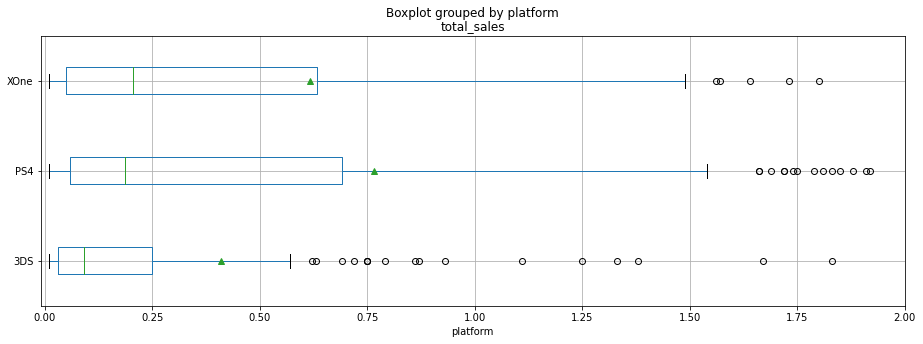

In [49]:
top_3_platform.boxplot('total_sales',by = 'platform', figsize = (15,5),showmeans = True, vert = False);
plt.xlim(-0.01, 2)
plt.show()

In [50]:
for item in top_3_list:
    display(item,top_3_platform.loc[top_3_platform.platform == item,'total_sales'].describe())

'PS4'

count    376.000000
mean       0.766356
std        1.614969
min        0.010000
25%        0.057500
50%        0.185000
75%        0.690000
max       14.630000
Name: total_sales, dtype: float64

'XOne'

count    228.000000
mean       0.615614
std        1.046513
min        0.010000
25%        0.050000
50%        0.205000
75%        0.632500
max        7.390000
Name: total_sales, dtype: float64

'3DS'

count    212.000000
mean       0.408868
std        1.188368
min        0.010000
25%        0.030000
50%        0.090000
75%        0.250000
max       11.680000
Name: total_sales, dtype: float64

<b>Вывод :</b>

Самая высокая медиана по глобальным продажам у платформы XOne, но PS4 не сильно отстает (0.20 VS 0.18), в то время как у платформы 3DS самая низкая медиана из трех платформ - 0.09 . У всех платформ среднее значение выше медианы, это говорит о том, что распределение ассимитрично в сторону высоких значений. Размах значений справа от медианы у PS4 ,больше, чем у других платформ, это значит , что значения больше медианы представляет собой более высокие значения, нежели у других платформ.

### Анализ влияния отзывов пользователей и критиков (на продажи)

* Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. 
* Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами. 

Напишем функцию для построения диаграмм распределения

In [51]:
def distr_diagram(dataframe,x,y,platform,ax):
    diagram = dataframe.plot(
        x=x,y=y,style = 'o'
        ,grid = True, ax = axes[ax],figsize = (17,5),
        title = f'Диаграмма распредления {y} от {x} для платформы {platform}'
    )
    return diagram

Выберем для анализа платформу PS4. 

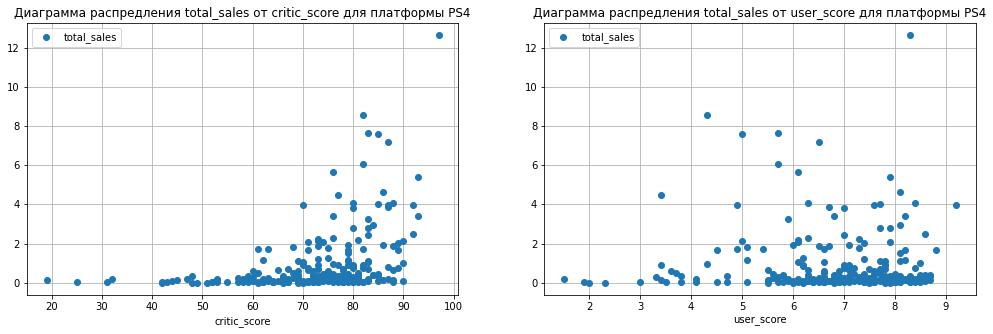

In [52]:
ps4_data = top_3_platform[top_3_platform.platform == 'PS4']
figure, axes = plt.subplots(1, 2)
distr_diagram(ps4_data,'critic_score','total_sales','PS4',0)
distr_diagram(ps4_data,'user_score','total_sales','PS4',1);


In [53]:
ps4_data['total_sales'].corr(ps4_data['critic_score'])

0.40266141068104083

In [54]:
ps4_data['total_sales'].corr(ps4_data['user_score']) 

-0.040131589472697356

<b>Вывод :</b>


* Была выбрана платформа PS4. Оценки критиков демонстрируют прямую, средне-слабую корреляцию с "цифрами" продаж, коэффициент корреляции равен 0.4, а оценки пользователей корреляции с продажами не имеют


### Сравнениние продаж игр на других платформах

* Соотнесите выводы с продажами игр на других платформах

Построим диаграммы распредления для платформы XOne

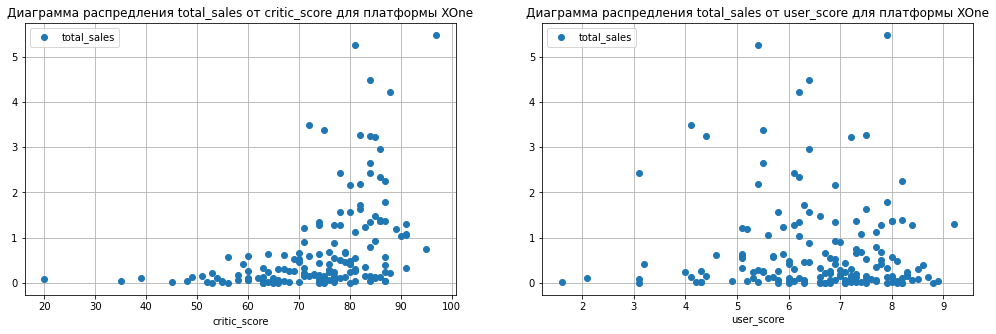

In [55]:
XOne_data = top_3_platform[top_3_platform.platform == 'XOne']
figure, axes = plt.subplots(1, 2)
distr_diagram(XOne_data,'critic_score','total_sales','XOne',0)
distr_diagram(XOne_data,'user_score','total_sales','XOne',1);

Построим диаграммы распредления для платформы 3DS

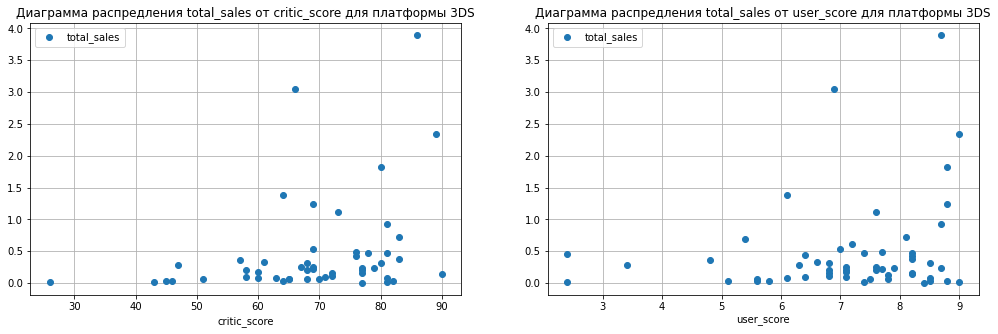

In [56]:
data_3DS = top_3_platform[top_3_platform.platform == '3DS']
figure, axes = plt.subplots(1, 2)
distr_diagram(data_3DS,'critic_score','total_sales','3DS',0)
distr_diagram(data_3DS,'user_score','total_sales','3DS',1);

<b>Выводы :</b>

* Можем сказать, что выводы, сделанные для платформы PS4, характерны и для платформы XOne.
* Но для платформы 3DS свзяь между оценками и продажами отсутствует. Познакомившись с платформой Nintendo 3DS, и узнав что это довольно простая и неприхотливая платформа портативного типа, можно предположить, для потребителя оценки критиков не так важны, так как стоимость и сложность игр для таких платформ будут небольшими, и пользователи не многим рискуют покупая игры для этой платформы не ознакомившись с оценками критиков.

### Общее распределение игр по жанрам

* Посмотрим на общее распределение игр по жанрам. 
* Посмотрим, что можно сказать о самых прибыльных жанрах, выделяются ли жанры с высокими и низкими продажами.

Посмотрим распредление количества выпущенных игр по жанрам.

In [57]:
games_per_genre = (
    pivot_for_df(actual_data,'genre','name','count')
    .sort_values(by = 'name',ascending = False )
    .reset_index(drop = True)
)
games_per_genre.T

,0,1,2,3,4,5,6,7,8,9,10,11
genre,Action,Role-Playing,Adventure,Sports,Shooter,Misc,Racing,Fighting,Simulation,Platform,Strategy,Puzzle
name,619,221,185,161,128,113,69,60,44,38,37,14


Посмотрим распредление общих продаж по жанрам.

In [58]:
sales_per_genre =  (
    pivot_for_df(actual_data,'genre','total_sales','sum')
    .sort_values(by = 'total_sales',ascending = False )
    .reset_index(drop = True)
)
sales_per_genre.T

,0,1,2,3,4,5,6,7,8,9,10,11
genre,Action,Shooter,Sports,Role-Playing,Misc,Fighting,Racing,Platform,Adventure,Simulation,Strategy,Puzzle
total_sales,199.36,170.94,109.48,101.44,37.55,28.22,27.52,18.09,17.55,13.13,3.96,2.21


Соеденим две таблицы и посчитаем, сколько в среднем млн копий продаж приходится на одну игру из соответсвующего жанра.

In [59]:
sales_game_genre = games_per_genre.merge(sales_per_genre, on = 'genre', how = 'outer')
sales_game_genre['sales_per_game'] = sales_game_genre['total_sales']/sales_game_genre['name']
sales_game_genre.sort_values(by = 'sales_per_game',ascending = False ).reset_index(drop = True)

,genre,name,total_sales,sales_per_game
0,Shooter,128,170.94,1.335469
1,Sports,161,109.48,0.680000
2,Platform,38,18.09,0.476053
3,Fighting,60,28.22,0.470333
4,Role-Playing,221,101.44,0.459005
5,Racing,69,27.52,0.398841
6,Misc,113,37.55,0.332301
7,Action,619,199.36,0.322068
8,Simulation,44,13.13,0.298409
9,Puzzle,14,2.21,0.157857


<b>Выводы :</b>
    
* Жанры лидеры по выпуску игр - Action,	Role-Playing,	Adventure( 619,	221,	185 игр соответсвенно)
* Жанры лидеры по общим глобальным продажам - Action,	Shooter,	Sports (199.36,	170.94	109.48,	 млн копий соответственно)
* Жанры лидеры по уровню продаж на одну игру (прибыльные) - Shooter, Sports ,Platform (1.33,0.68, 0.47 млн копий на 1 игру из жанра)

## Портрет пользователя каждого региона

Определим для пользователя каждого региона (NA, EU, JP):
* Самые популярные платформы (топ-5). Опишите различия в долях продаж.
* Самые популярные жанры (топ-5). Поясните разницу.
* Влияет ли рейтинг ESRB на продажи в отдельном регионе?

Напишем функцию для определения топ-5 платформ по заданным критериям.

In [60]:
def top_5_choice(dataframe,index,values,afffunc):
    result = (
    pivot_for_df(dataframe,index,values,afffunc)
    .sort_values(by = values,ascending = False )
    .reset_index(drop = True)
    )
    return result.head().T

Напишем функцию для определения параметров влияния рейтинга ESRB.

In [61]:
def esrb_func(region):
    esrb_df = pivot_for_df(actual_data,'rating',[region,'name'],{region:'sum','name':'count'})\
    .reset_index(drop = True).sort_values(by = region,ascending = False )
    esrb_df['sales_per_game'] = esrb_df[region]/esrb_df['name']
    display(esrb_df.T)
    figure, axes = plt.subplots(1, 2)
    esrb_df.plot(kind = 'pie',
        y = region,
        x = 'rating', legend = True,labels =esrb_df['rating'],
        title = f'Диаграмма по столбцам {region} \nи rating для датафрейфа :esrb_df',
        grid = True,figsize = (10,7),autopct='%1.0f%%',ax = axes[0]
        ).set_ylabel(region)
    esrb_df.plot(kind = 'bar',
        y = 'sales_per_game',
        x = 'rating', legend = True,label ='sales_per_game',
        title = f'График по столбцам {region} и \nrating для датафрейфа :esrb_df',
        grid = True,figsize = (13,5),ax = axes[1]
        ).set_ylabel('sales_per_game')


### Регион NA

<b>Самые популярные платформы (топ-5)</b>

In [62]:
top_5_choice(actual_data,"platform",'na_sales','sum')

,0,1,2,3,4
platform,PS4,XOne,X360,3DS,PS3
na_sales,98.61,81.27,28.3,22.64,22.05


<b>Самые популярные жанры(топ-5)</b>

In [63]:
top_5_choice(actual_data,"genre",'na_sales','sum')

,0,1,2,3,4
genre,Shooter,Action,Sports,Role-Playing,Misc
na_sales,79.02,72.53,46.13,33.47,15.05


<b>Рейтинг ESRB </b>

,2,4,0,3,1
rating,M,w/o_rating,E,T,E10+
na_sales,96.42,64.72,50.74,38.95,33.23
name,265,749,219,271,185
sales_per_game,0.363849,0.086409,0.231689,0.143727,0.179622


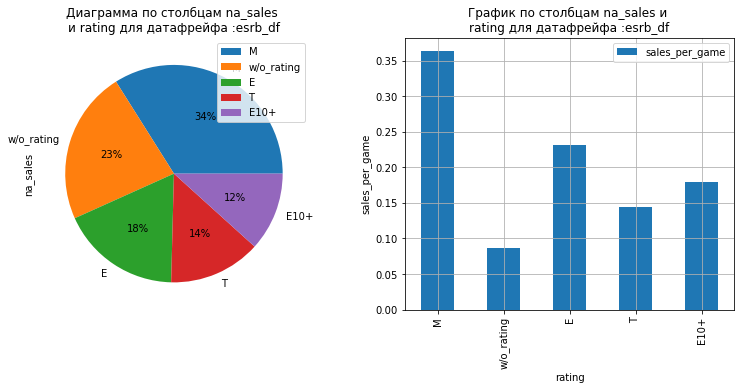

In [64]:
esrb_func('na_sales')

<b>Выводы :</b>

Для пользоватлей региона Северной Америки характерно следующее:

* Пользователи предпочитают следующие платформы (в порядке убывания популярности):PS4,	XOne,	X360,	3DS,	PS3.
* Сыме популярные жанры (в порядке убывания популярности): Shooter,	Action,	Sports,	Role-Playing,	Misc
* Можем видеть, что игры с рейтиингом М продавались чаще других игр с другими рейтингами,на втором месте игры без рейтинга и на третьем E. Игры с рейтингом М самые  прибыльные - на одну игру с рейтингом приходится больше продаж, чем на игры с другим рейтингом. 

### Регион EU

<b>Самые популярные платформы (топ-5)</b>

In [65]:
top_5_choice(actual_data,"platform",'eu_sales','sum')

,0,1,2,3,4
platform,PS4,XOne,PS3,PC,3DS
eu_sales,130.04,46.25,25.54,17.97,16.12


<b>Самые популярные жанры(топ-5)</b>

In [66]:
top_5_choice(actual_data,"genre",'eu_sales','sum')

,0,1,2,3,4
genre,Action,Shooter,Sports,Role-Playing,Racing
eu_sales,74.68,65.52,45.73,28.17,14.13


<b>Рейтинг ESRB</b>

,2,4,0,3,1
rating,M,w/o_rating,E,T,E10+
eu_sales,93.44,58.95,58.06,34.07,26.16
name,265,749,219,271,185
sales_per_game,0.352604,0.078705,0.265114,0.12572,0.141405


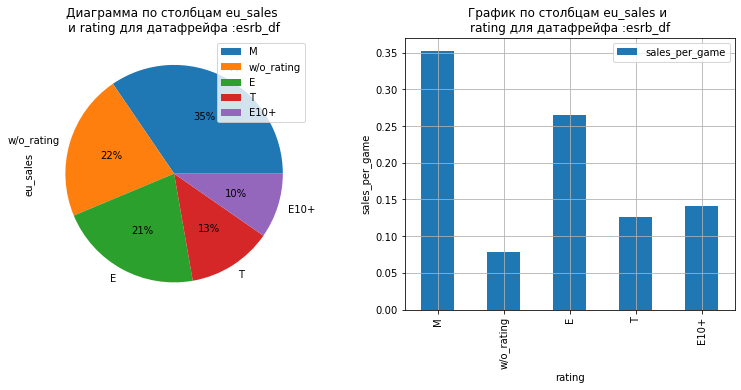

In [67]:
esrb_func('eu_sales')

<b>Выводы :</b>

Для пользоватлей региона Европа характерно следующее:

* Пользователи предпочитают следующие платформы (в порядке убывания популярности):PS4,	XOne,	PS3,	PC,	3DS
* Сыме популярные жанры (в порядке убывания популярности): Action,	Shooter,	Sports,	Role-Playing,	Racing
* Можем видеть, что игры с рейтиингом М продавались чаще других игр с другими рейтингами,на втором месте игры без рейтинга и на третьем игры с рейтингом E. Прибыльность игр практически соответсвует такому порядку : на одну игру с рейтингом М приходится больше продаж, чем на игры с другим рейтингом. На втором месте по прибыльности игры с рейтингом E. 

Портреты пользователей из Сев. Америки и Европы по данным параметрам схожи.

### Регион JP

<b>Самые популярные платформы (топ-5)</b>

In [68]:
top_5_choice(actual_data,"platform",'jp_sales','sum')

,0,1,2,3,4
platform,3DS,PS4,PSV,PS3,WiiU
jp_sales,44.24,15.02,14.54,11.22,7.31


<b>Самые популярные жанры(топ-5)</b>

In [69]:
top_5_choice(actual_data,"genre",'jp_sales','sum')

,0,1,2,3,4
genre,Role-Playing,Action,Fighting,Misc,Shooter
jp_sales,31.16,29.58,6.37,5.61,4.87


<b>Рейтинг ESRB</b>

,4,3,0,2,1
rating,w/o_rating,T,E,M,E10+
jp_sales,56.9,14.78,8.94,8.01,4.46
name,749,271,219,265,185
sales_per_game,0.075968,0.054539,0.040822,0.030226,0.024108


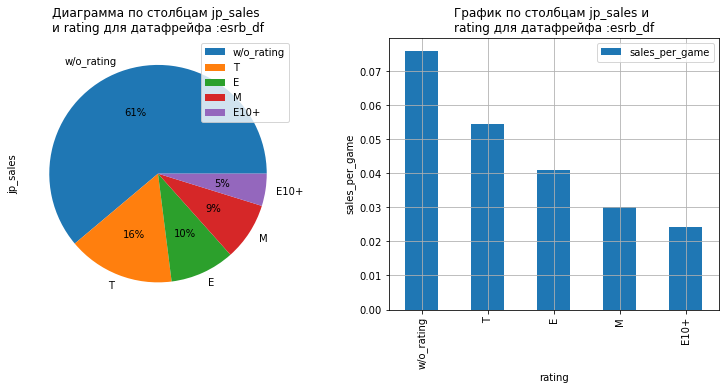

In [70]:
esrb_func('jp_sales')

<b>Выводы :</b>

Для пользоватлей региона Японии характерно следующее:

* Пользователи предпочитают следующие прлатформы (в порядке убывания популярности):3DS,	PS4,	PSV,	PS3,	WiiU
* Сыме популярные жанры (в порядке убывания популярности): Role-Playing,	 Action	Fighting,	Misc,	Shooter
* Можем видеть, что игры без  рейтиинга продавались чаще игр с  рейтингами,на втором месте ретинг Т и на третьем E. Прибыльность игр  соответсвует аналогичному порядку.

Портрет пользователя из Японии значительно отличается от пользователей Европы и Северной Америки по данным параметрам.

## Проверка гипотез

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Для провекрки это гипотезы сформулируем нулевую и альтернативную гипотезы

H0 - cредние пользовательские рейтинги платформ Xbox One и PC равны
H1 - cредние пользовательские рейтинги платформ Xbox One и PC различны

Используем специальный метод для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборка, с учетом, что дисперсии скорее всего будут разными.

In [71]:
alpha = 0.05


sample_1 = actual_data.query(
    ('platform =="XOne" & user_score.isna() == False  ')
)['user_score']
sample_2 = actual_data.query(
    'platform =="PC"  & user_score.isna() == False  '
)['user_score']

results = st.ttest_ind(
    sample_1, 
    sample_2,
    equal_var=False
)

print('pvalue:',results.pvalue)

if results.pvalue > alpha:
    print("Не отвергаем нулевую гипотезу")
elif results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")

pvalue: 0.11601398086668832
Не отвергаем нулевую гипотезу


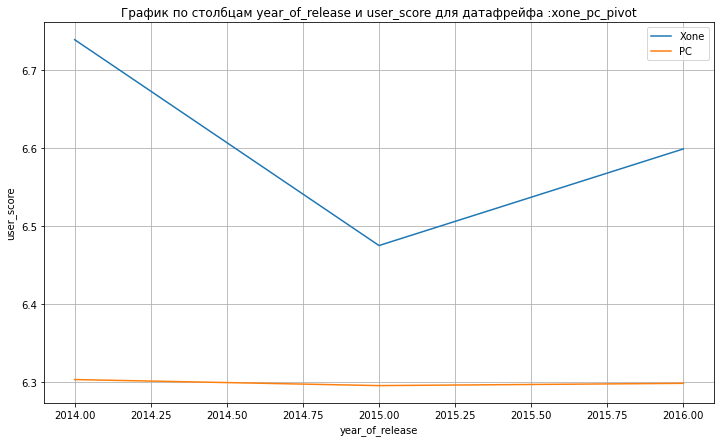

In [72]:
xone_pc_pivot = pivot_for_df(
    actual_data,['platform','year_of_release'],'user_score','mean'
)
xone_pc_pivot[xone_pc_pivot.platform == "XOne"]
a = linear_graph(
    xone_pc_pivot[xone_pc_pivot.platform == "XOne"],
    'year_of_release','user_score',"Xone",
    'user_score','xone_pc_pivot',False
)
a
linear_graph(
    xone_pc_pivot[xone_pc_pivot.platform == "PC"],
    'year_of_release','user_score',"PC",'user_score',
    'xone_pc_pivot',True
);

<b> Вывод: </b>

P-value при проведении статистического теста оказался больше уровня статистической значимости, поэтому мы отвергаем альтернативную гипотезу, и у нас нет оснований отвергнуть нулевую -  cредние пользовательские рейтинги платформ Xbox One и PC одинаковые.

### Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Для провекрки это гипотезы сформулируем нулевую и альтернативную гипотезы

H0 - Средние пользовательские рейтинги жанров Action и Sports равны
H1 - Средние пользовательские рейтинги жанров Action и Sports  различны

Используем специальный метод для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборка, с учетом, что дисперсии скорее всего будут разными.

In [73]:
alpha = 0.05


sample_1 = actual_data.query('genre =="Action" & user_score.isna() == False  ')['user_score']
sample_2 = actual_data.query('genre =="Sports"  & user_score.isna() == False  ')['user_score']

results = st.ttest_ind(
    sample_1, 
    sample_2,
    equal_var=False
)

print('pvalue:',results.pvalue)

if results.pvalue > alpha:
    print("Не отвергаем нулевую гипотезу")
elif results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")

pvalue: 1.1825550382644557e-14
Отвергаем нулевую гипотезу


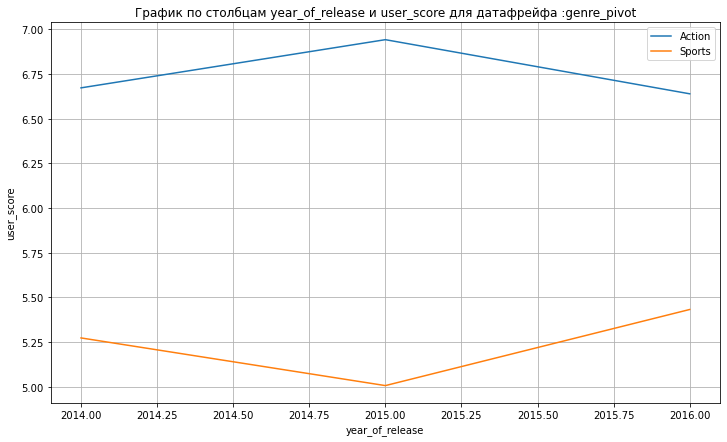

In [74]:
genre_pivot = pivot_for_df(
    actual_data,['genre','year_of_release'],'user_score','mean'
)

a = linear_graph(
    genre_pivot[genre_pivot.genre == "Action"],
    'year_of_release','user_score',"Action",
    'user_score','genre_pivot',False
)
a
linear_graph(
    genre_pivot[genre_pivot.genre == "Sports"],
    'year_of_release','user_score',"Sports",
    'user_score','genre_pivot',True
);

<b> Вывод: </b>

P-value при проведении статистического теста оказался меньше уровня статистической значимости, поэтому мы отвергаем нулевую гипотезу, но не отвергаем альтернативную - cредние пользовательские рейтинги жанров Action и Sports  различны

## Общий вывод

* Выводы по первичному обзору данных - были выявлены следующие особенности датасета:

 * 16715 строчек, 11 столбцов
 * в столбцах `Name`,`Year_of_Release`,`Genre`,`Critic_Score `,`User_Score`,`Rating` присутствуют пропуски
 * в названиях столбцов используется верхний регистр
 * в столбцах `User_Score`,`Year_of_Release` необходимо изменить тип данных
 * в файле отсутсвуют полные дубликаты
 * в столбцах с категориальными переменными неявные дубликаты выявлены не были
 * странным выглядит нулевая медиана по продажам в Японии
 * были выявлены неявные дубликаты, которые требуют обработки
* Выводы по подготовке данных:
 * изменен тип данных в столбцах `user_score` и `year_of_release`
 * обработаны пропуски в столбце `year_of_release` - они были удалены ввиду их незначительного количества
 * в столбце `name` было всего два пропуска, строки с этими пропусками были удалены.
 * количество пропусков в столбцах с оценками экспертов и с оценками пользователей свзяана со временем
 * количество пропусков в столбце `rating` свяазано со временем и регионом, где проходили продажи.
 * были посчитаны суммарные продажи и добавлены новым столбцом в датасет
* Выводы по исследовательскому анализу данных
 * Выпуск игр
   * на графике можем увидеть, что в период с 1980 по 1995 года количество игр было значительно меньше, чем в остальное время.
   * С 2000 года происходит резкий скачок в росте.
   * Наибольшое количество игр приходится на 2008-2009 года
   * Количество игр росло вплоть до 2009 года, затем происходит снижение.
 * Изменение продаж (по платформам)
   * Средний срок, за который появляются новые и исчезают старые платформы - 10 лет
   *  Топ 10 платформ по объему продаж:'PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'GBA', 'PS4', 'PSP', '3DS'
   * Странным является то, что у платформы DS были продажи в 1985 году, затем они прекратились и опять начались в 2004.
 * Выбор актуального периода
   *   период 2014 - 2016 актаульным, так как:
     * данный период включает в себя достаточно большую выборку по выпущенным играм ( 10 % от всего датасета)
     * он не больше среднего срока устаревания игровых платформ - 10-11 лет
     * период достаточно близок к 2017 году.
 * Лидеры по продажам
   * Топ 3 платформы по объему продаж за 2014 - 2016 гг. : PS4, XOne, 3DS
   * Топ 3 платформы по большему среднему годовому приросту в процентах: PS4, XOne, PC.
   * Топ 3 платформы по меньшему среднему годовому приросту в процентах : PS3, X360, Wii.
   * Топ 3 потенциально прибыльных платформ : PS4, XOne, 3DS
 * Медиана глобальных продаж
   * Самая высокая медиана по глобальным продажам у платформы XOne, но PS4 не сильно отстает (0.20 VS 0.18), в то время как у платформы 3DS самая низкая медиана из трех платформ - 0.09 . У всех платформ среднее значение выше медианы, это говорит о том, что распределение ассимитрично в сторону высоких значений. Размах значений справа от медианы у PS4 ,больше, чем у других платформ, это значит , что значения больше медианы представляет собой более высокие значения, нежели у других платформ.
  * Анализ влияния отзывов пользователей и критиков 
    * Была выбрана платформа PS4. Оценки критиков демонстрируют прямую, средне-слабую корреляцию с "цифрами" продаж, коэффициент корреляции равен 0.4, а оценки пользователей корреляции с продажами не имеют
  *  Сравнениние продаж игр на других платформах
     * Можем сказать, что выводы, сделанные для платформы PS4, характерны и для платформы XOne.
     * Для платформы 3DS свзяь между оценками и продажами отсутствует. 
  * Общее распределение игр по жанрам
     * Жанры лидеры по выпуску игр - Action, Role-Playing, Adventure( 619, 221, 185 игр соответсвенно)
     * Жанры лидеры по общим глобальным продажам - Action, Shooter, Sports (199.36, 170.94 109.48, млн копий соответственно)
     * Жанры лидеры по уровню продаж на одну игру (прибыльные) - Shooter, Sports ,Platform (1.33,0.68, 0.47 млн копий на 1 игру из жанра)
  *  Портрет пользователя каждого региона
     * Регион NA
       * Пользователи предпочитают следующие платформы (в порядке убывания популярности):PS4, XOne, X360, 3DS, PS3.
       * ССыме популярные жанры (в порядке убывания популярности): Shooter, Action, Sports, Role-Playing, Misc
       * Можем видеть, что игры с рейтиингом М продавались чаще других игр с другими рейтингами,на втором месте игры без рейтинга и на третьем E. Игры с рейтингом М самые прибыльные - на одну игру с рейтингом приходится больше продаж, чем на игры с другим рейтингом.
     * Регион EU
       * Пользователи предпочитают следующие платформы (в порядке убывания популярности):PS4, XOne, PS3, PC, 3DS
       * Сыме популярные жанры (в порядке убывания популярности): Action, Shooter, Sports, Role-Playing, Racing
       * Можем видеть, что игры с рейтиингом М продавались чаще других игр с другими рейтингами,на втором месте игры без рейтинга и на третьем игры с рейтингом E. Прибыльность игр практически соответсвует такому порядку : на одну игру с рейтингом М приходится больше продаж, чем на игры с другим рейтингом. На втором месте по прибыльности игры с рейтингом E
       * Портреты пользователей из Сев. Америки и Европы по данным параметрам схожи.
     *   Регион JP
       * Пользователи предпочитают следующие прлатформы (в порядке убывания популярности):3DS, PS4, PSV, PS3, WiiU
       * Сыме популярные жанры (в порядке убывания популярности): Role-Playing, Action Fighting, Misc, Shooter
       * Можем видеть, что игры без рейтиинга продавались чаще игр с рейтингами,на втором месте ретинг Т и на третьем E. Прибыльность игр соответсвует аналогичному порядку.
       * Портрет пользователя из Японии значительно отличается от пользователей Европы и Северной Америки по данным параметрам.
* Проверка гипотез
     * Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
       * P-value при проведении статистического теста оказался больше уровня статистической значимости, поэтому мы отвергаем альтернативную гипотезу, и у нас нет оснований отвергнуть нулевую - cредние пользовательские рейтинги платформ Xbox One и PC одинаковые.
       * Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные
       * P-value при проведении статистического теста оказался меньше уровня статистической значимости, поэтому мы отвергаем нулевую гипотезу, но не отвергаем альтернативную - cредние пользовательские рейтинги жанров Action и Sports различны
